# Used Car Price Prediction
## Model Training & Evaluation

This notebook trains a baseline machine learning model to predict car prices
using the cleaned Craigslist dataset (sample 5000 rows).


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

plt.style.use("default")
pd.set_option("display.max_columns", None)


In [2]:
# Load Dataset

df = pd.read_csv("../data/cleaned_vehicles_sample.csv")
df.head()


,price,manufacturer,model,condition,cylinders,fuel,transmission,drive,type,state,car_age,log_odometer
0,33590,gmc,sierra 1500 crew cab slt,good,8 cylinders,gas,other,unknown,pickup,al,11.0,10.966887
1,22590,chevrolet,silverado 1500,good,8 cylinders,gas,other,unknown,pickup,al,15.0,11.173669
2,39590,chevrolet,silverado 1500 crew,good,8 cylinders,gas,other,unknown,pickup,al,5.0,9.860632
3,30990,toyota,tundra double cab sr,good,8 cylinders,gas,other,unknown,pickup,al,8.0,10.624371
4,15000,ford,f-150 xlt,excellent,6 cylinders,gas,automatic,rwd,truck,al,12.0,11.759793


In [3]:
# Quick Dataset Overview

print("Dataset shape:", df.shape)
print(df.info())
print(df.describe())


Dataset shape: (4485, 12)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4485 entries, 0 to 4484
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   price         4485 non-null   int64  
 1   manufacturer  4300 non-null   object 
 2   model         4462 non-null   object 
 3   condition     4485 non-null   object 
 4   cylinders     4485 non-null   object 
 5   fuel          4485 non-null   object 
 6   transmission  4485 non-null   object 
 7   drive         4485 non-null   object 
 8   type          4485 non-null   object 
 9   state         4485 non-null   object 
 10  car_age       4485 non-null   float64
 11  log_odometer  4485 non-null   float64
dtypes: float64(2), int64(1), object(9)
memory usage: 420.6+ KB
None
               price      car_age  log_odometer
count    4485.000000  4485.000000   4485.000000
mean    21186.629877    12.002676     10.909432
std     13119.247245     5.933808      1.376633
min 

In [4]:
# Features and Target

# Target variable
y = df["price"]

# Features
X = df.drop(columns=["price"])

# Identify categorical and numerical columns
categorical_cols = X.select_dtypes(include="object").columns.tolist()
numerical_cols = X.select_dtypes(include=["int64", "float64"]).columns.tolist()

print("Categorical columns:", categorical_cols)
print("Numerical columns:", numerical_cols)


Categorical columns: ['manufacturer', 'model', 'condition', 'cylinders', 'fuel', 'transmission', 'drive', 'type', 'state']
Numerical columns: ['car_age', 'log_odometer']


In [5]:
# Train/Test Split

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

print("Training set:", X_train.shape)
print("Test set:", X_test.shape)


Training set: (3588, 11)
Test set: (897, 11)


In [6]:
# Preprocessing Pipeline

# One-hot encode categorical variables, scale numerical
preprocessor = ColumnTransformer(
    transformers=[
        ("num", StandardScaler(), numerical_cols),
        ("cat", OneHotEncoder(handle_unknown="ignore"), categorical_cols)
    ]
)


In [7]:
# Create Full Pipeline with Linear Regression

model_pipeline = Pipeline(steps=[
    ("preprocessor", preprocessor),
    ("regressor", LinearRegression())
])


In [8]:
# Train the Model

model_pipeline.fit(X_train, y_train)


,"steps steps: list of tuplesList of (name of step, estimator) tuples that are to be chained insequential order. To be compatible with the scikit-learn API, all stepsmust define `fit`. All non-last steps must also define `transform`. See:ref:`Combining Estimators ` for more details.","[('preprocessor', ...), ('regressor', ...)]"
,"transform_input transform_input: list of str, default=NoneThe names of the :term:`metadata` parameters that should be transformed by thepipeline before passing it to the step consuming it.This enables transforming some input arguments to ``fit`` (other than ``X``)to be transformed by the steps of the pipeline up to the step which requiresthem. Requirement is defined via :ref:`metadata routing `.For instance, this can be used to pass a validation set through the pipeline.You can only set this if metadata routing is enabled, which youcan enable using ``sklearn.set_config(enable_metadata_routing=True)``... versionadded:: 1.6",None
,"memory memory: str or object with the joblib.Memory interface, default=NoneUsed to cache the fitted transformers of the pipeline. The last stepwill never be cached, even if it is a transformer. By default, nocaching is performed. If a string is given, it is the path to thecaching directory. Enabling caching triggers a clone of the transformersbefore fitting. Therefore, the transformer instance given to thepipeline cannot be inspected directly. Use the attribute ``named_steps``or ``steps`` to inspect estimators within the pipeline. Caching thetransformers is advantageous when fitting is time consuming. See:ref:`sphx_glr_auto_examples_neighbors_plot_caching_nearest_neighbors.py`for an example on how to enable caching.",None
,"verbose verbose: bool, default=FalseIf True, the time elapsed while fitting each step will be printed as itis completed.",False
,"transformers transformers: list of tuplesList of (name, transformer, columns) tuples specifying thetransformer objects to be applied to subsets of the data.name : str Like in Pipeline and FeatureUnion, this allows the transformer and its parameters to be set using ``set_params`` and searched in grid search.transformer : {'drop', 'passthrough'} or estimator Estimator must support :term:`fit` and :term:`transform`. Special-cased strings 'drop' and 'passthrough' are accepted as well, to indicate to drop the columns or to pass them through untransformed, respectively.columns : str, array-like of str, int, array-like of int, array-like of bool, slice or callable Indexes the data on its second axis. Integers are interpreted as positional columns, while strings can reference DataFrame columns by name. A scalar string or int should be used where ``transformer`` expects X to be a 1d array-like (vector), otherwise a 2d array will be passed to the transformer. A callable is passed the input data `X` and can return any of the above. To select multiple columns by name or dtype, you can use :obj:`make_column_selector`.","[('num', ...), ('cat', ...)]"
,"remainder remainder: {'drop', 'passthrough'} or estimator, default='drop'By default, only the specified columns in `transformers` aretransformed and combined in the output, and the non-specifiedcolumns are dropped. (default of ``'drop'``).By specifying ``remainder='passthrough'``, all remaining columns thatwere not specified in `transformers`, but present in the data passedto `fit` will be automatically passed through. This subset of columnsis concatenated with the output of the transformers. For dataframes,extra columns not seen during `fit` will be excluded from the outputof `transform`.By setting ``remainder`` to be an estimator, the remainingnon-specified columns will use the ``remainder`` estimator. Theestimator must support :term:`fit` and :term:`transform`.Note that using this feature requires that the DataFrame columnsinput at :term:`fit` and :term:`transform` have identical order.",'drop'
,"sparse_threshold sparse_threshold: float, default=0.3If the output of the different transformer

In [9]:
# Evaluate the Model

# Predictions
y_pred = model_pipeline.predict(X_test)

# Metrics
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)

print(f"MAE: ${mae:,.2f}")
print(f"RMSE: ${rmse:,.2f}")
print(f"R^2: {r2:.3f}")


MAE: $3,775.42
RMSE: $6,867.78
R^2: 0.724


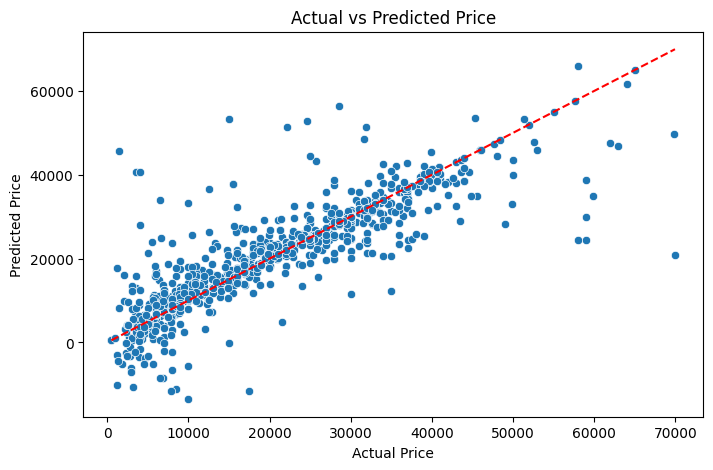

In [10]:
# Residuals Visualization

plt.figure(figsize=(8,5))
sns.scatterplot(x=y_test, y=y_pred)
plt.xlabel("Actual Price")
plt.ylabel("Predicted Price")
plt.title("Actual vs Predicted Price")
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], "r--")
plt.show()


In [11]:
# Feature Importance

# Only makes sense if one-hot encoding is simple; otherwise skip
regressor = model_pipeline.named_steps["regressor"]
if hasattr(regressor, "coef_"):
    print("Model coefficients (first 20):", regressor.coef_[:20])


Model coefficients (first 20): [ -7323.87008464  -2160.2521659   -1845.71108323   3187.03148261
    423.34331854  -9048.15464913  -7225.1171759    1949.76957941
   1175.59212005  -4933.64613214  28484.21282853  48768.57550823
  -8747.07996241    364.74273351   2475.91750255  -5302.35496389
  -9972.99908242   -984.68960215   1700.94547547 -12656.8513977 ]


### Summary

- Trained a baseline Linear Regression model to predict used car prices.
- Evaluated with MAE, RMSE, and R².
- Next steps could include:
  - More advanced models (Random Forest, XGBoost, CatBoost)
  - Hyperparameter tuning
  - Cross-validation
  - Feature engineering for categorical features (like manufacturer + model)
